# 1.1. Описание проекта

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.\
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.\
Постройте модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте F1-меру на тестовой выборке самостоятельно.\
Дополнительно измеряйте AUC-ROC, сравнивайте её значение с F1-мерой.

# 1.2. Инструкция по выполнению проекта

Загрузите и подготовьте данные. Поясните порядок действий.\
Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.\
Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.\
Проведите финальное тестирование.

# 1.3. Описание данных

Данные находятся в файле Churn.csv (англ. «отток клиентов»).
Признаки
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — количество недвижимости у клиента
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак
- Exited — факт ухода клиента

# 2. Подготовка данных 

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [141]:
df = pd.read_csv('Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [142]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [144]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [145]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [146]:
df.Tenure = df.Tenure.fillna(-1)

In [147]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


# 3. Исследование данных

In [148]:
print('Баланс классов: ', df.Exited.value_counts()/len(df)) #наблюдается сильный дисбаланс классов

Баланс классов:  0    0.7963
1    0.2037
Name: Exited, dtype: float64


In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

In [150]:
encoder = OrdinalEncoder()
df_ordinal = pd.DataFrame(encoder.fit_transform(df), columns=df.columns)

In [151]:
X = df_ordinal.drop('Exited',axis=1)
y = df_ordinal['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [152]:
%%time

dtree = DecisionTreeClassifier(max_depth=5, random_state=101)
dtree.fit(X_train, y_train)
prediction = dtree.predict(X_test)
print('Train accuracy score (dtree): ', accuracy_score(y_test, prediction))
print('f1_score (dtree): ', f1_score(y_test, prediction))

Train accuracy score (dtree):  0.855
f1_score (dtree):  0.5406546990496304
CPU times: user 22.3 ms, sys: 2.49 ms, total: 24.8 ms
Wall time: 25.4 ms


In [153]:
%%time

forest = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=101)
forest.fit(X_train, y_train)
prediction = forest.predict(X_test)
print('Train accuracy score (forest): ', accuracy_score(y_test, prediction))
print('f1_score (forest): ', f1_score(y_test, prediction))

Train accuracy score (forest):  0.841
f1_score (forest):  0.4259927797833935
CPU times: user 63.4 ms, sys: 4.59 ms, total: 68 ms
Wall time: 68 ms


Мы исследовали баланс классов - видим, что выборка несбалансированна (80% - класс "0" (действующие пользователи), 20% - класс "1" (отток);\
Применили порядковое кодирование (Ordinal Encoding) для преобразования категориальных признаков в числовые. \
Т.к. ordinal encoding не подходит для логистической регрессии, построим модели решающего дерева и случайного леса. 
Т.к. в нашем датасете наблюдается дисбаланс классов, и низкая f1 мера, попробуем построить модели с учетом дисбаланса.

In [154]:
from sklearn.utils import shuffle

In [155]:
%%time 

dtree = DecisionTreeClassifier(max_depth=5, random_state=101, class_weight = 'balanced')
dtree.fit(X_train, y_train)
prediction = dtree.predict(X_test)
print('Train accuracy score (dtree): ', accuracy_score(y_test, prediction))
print('f1_score (dtree): ', f1_score(y_test, prediction))

Train accuracy score (dtree):  0.768
f1_score (dtree):  0.573529411764706
CPU times: user 26.8 ms, sys: 3.04 ms, total: 29.8 ms
Wall time: 29.7 ms


In [156]:
%%time

forest = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=101, class_weight='balanced')
forest.fit(X_train, y_train)
prediction = forest.predict(X_test)
print('Train accuracy score (forest): ', accuracy_score(y_test, prediction))
print('f1_score (forest): ', f1_score(y_test, prediction))

Train accuracy score (forest):  0.785
f1_score (forest):  0.5836023240800516
CPU times: user 65.8 ms, sys: 3.63 ms, total: 69.4 ms
Wall time: 70.9 ms


In [157]:
results = []
for estimators in range (10,60,10):
    for depth in range(3,15,1):
        forest = RandomForestClassifier(n_estimators=estimators, max_depth=depth, class_weight='balanced', random_state=101)
        forest.fit(X_train, y_train)
        prediction = forest.predict(X_test)
        accuracy = accuracy_score(y_test, prediction)
        f1score = f1_score(y_test, prediction)
        results.append([estimators, depth, accuracy, f1score])

In [158]:
results = pd.DataFrame(results, columns = ['estimators', 'depth', 'f1_score', 'accuracy_score'])
results.head()

,estimators,depth,f1_score,accuracy_score
0,10,3,0.789000,0.584918
1,10,4,0.771000,0.571963
2,10,5,0.785000,0.583602
3,10,6,0.785667,0.583279
4,10,7,0.783000,0.579729


In [159]:
best_models = results.sort_values(by = 'f1_score', ascending=False).head().reset_index(drop=True)
print('Лучшие модели по f1 score: ')
print(best_models)

Лучшие модели по f1 score: 
   estimators  depth  f1_score  accuracy_score
0          30     14  0.860333        0.616651
1          50     14  0.860000        0.609665
2          50     13  0.858000        0.624339
3          40     14  0.856667        0.600372
4          20     12  0.856667        0.636210


In [160]:
forest = RandomForestClassifier(n_estimators=30, max_depth=14, class_weight='balanced', random_state=101)
forest.fit(X_train, y_train)
prediction = forest.predict(X_test)
print(f1_score(y_test, prediction))
print(accuracy_score(y_test, prediction))

0.6166514181152791
0.8603333333333333


Теперь попробуем устранить дисбаланс классов с помощью downsampling & upsampling

In [166]:
X = df_ordinal.drop('Exited',axis=1)
y = df_ordinal['Exited']
def upsample(X, y, repeat):
    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    X_upsampled = pd.concat([X_zeros] + [X_ones] * repeat)
    y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat)
    
    X_upsampled, y_upsampled = shuffle(X_upsampled, y_upsampled, random_state=101)
    
    return X_upsampled, y_upsampled

In [181]:
X_upsampled, y_upsampled = upsample(X_train, y_train, 4)

print("Баланс классов после upsampling: ")
print(y_upsampled.value_counts()/len(y_upsampled))

Баланс классов после upsampling: 
1.0    0.503335
0.0    0.496665
Name: Exited, dtype: float64


In [133]:
def downsample (X,y, fraction):
    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]
    
    X_downsampled = pd.concat([X_zeros.sample(frac = fraction, random_state=101)] + [X_ones])
    y_downsampled = pd.concat([y_zeros.sample(frac=fraction, random_state=101)] + [y_ones])
    
    X_downsampled, y_downsampled = shuffle(X_downsampled, y_downsampled, random_state=101)
    
    return X_downsampled, y_downsampled

In [184]:
X_downsampled, y_downsampled = downsample(X_train, y_train, 0.25)
print("Баланс классов после downsampling:")
print(y_downsampled.value_counts()/len(y_downsampled))

Баланс классов после downsampling:
1.0    0.50338
0.0    0.49662
Name: Exited, dtype: float64


In [187]:
results = [] 

for estimators in range(10, 110, 10): 
    for depth in range(3, 20, 1):
        forest = RandomForestClassifier(n_estimators=estimators, max_depth=depth, class_weight='balanced', random_state=12345) 
        forest.fit(X_upsampled, y_upsampled)
        prediction = forest.predict(X_test)
        f1score = f1_score(y_test, prediction)
        accuracy = accuracy_score(y_test, prediction)
        results.append([estimators, depth, f1score, accuracy])

results = pd.DataFrame(results, columns = ['estimators', 'depth', 'f1_score', 'accuracy'])

In [189]:
print("Лучшие модели по F1-метрике (upsampling): ")
print(results.sort_values(by='f1_score', ascending=False).head()) 

Лучшие модели по F1-метрике (upsampling): 
     estimators  depth  f1_score  accuracy
164         100     14  0.638095  0.848000
80           50     15  0.637037  0.853000
79           50     14  0.636656  0.849333
130          80     14  0.636291  0.848333
96           60     14  0.635634  0.848667


In [192]:
results = []

for estimators in range(10,105,10):
    for depth in range(3,20,1):
        forest = RandomForestClassifier(n_estimators=estimators, max_depth=depth, class_weight='balanced', random_state=101)
        forest.fit(X_downsampled, y_downsampled)
        prediction = forest.predict(X_test)
        f1score = f1_score(y_test, prediction)
        accuracy = accuracy_score(y_test, prediction)
        results.append([estimators, depth, f1score, accuracy])
        
results = pd.DataFrame(results, columns = ['estimators','depth','f1 score','accuracy'])

In [194]:
print("Лучшие модели по F1-метрике (downsampling): ")
print(results.sort_values(by='f1 score', ascending=False).head()) 

Лучшие модели по F1-метрике (downsampling): 
     estimators  depth  f1 score  accuracy
114          70     15  0.603558  0.792000
165         100     15  0.603558  0.792000
148          90     15  0.603295  0.791333
40           30      9  0.603215  0.794333
57           40      9  0.602317  0.794000


Для того, чтобы устранить дисбаланс нами были предприняты следующие действия: 

1) была произведена автокоррекция весов классов (class_weight='balanced' в RandomForest),
2) также мы изменили train sample с помощью методов даунсэмплинга и апсемплинга,
3) Вычислили accuracy(точность) и F1-метрику для моделей с различными параметрами n_estimators (от 10 до 105 с шагом 10) , а также max_depth (от 3 до 20 с шагом 1) .

После проведенного исследования, мы обнаружили, что максимальные значения метрики f1-score достигается у модели RandomForest с автокоррекцией веса (class_weight='balanced'), со значениями n_estimators = 30, max_depth = 14

# 4. Финальное тестирование данных

In [195]:
from sklearn.metrics import roc_auc_score, roc_curve

0.8641235711059849


<function matplotlib.pyplot.show(*args, **kw)>

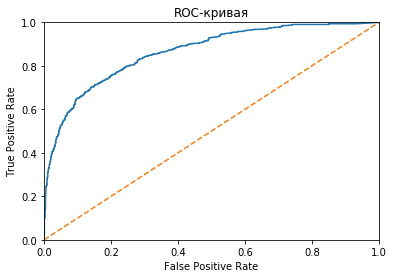

In [201]:
forest = RandomForestClassifier(n_estimators=30, max_depth=14, class_weight = 'balanced', random_state=101)
forest.fit(X_train, y_train)
prediction = forest.predict(X_test)
probabilities_test = forest.predict_proba(X_test)
probabilities_one_test = probabilities_test[:,1]

roc_auc = roc_auc_score(y_test, probabilities_one_test)
print(roc_auc)

fpr,tpr,thresholds = roc_curve(y_test, probabilities_one_test)

plt.figure()
plt.plot(fpr,tpr)
#ROC-кривая случайной модели(выглядит как прямая)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show


In [204]:
print('F1-score на тестовой выборке: ', f1_score(forest.predict(X_test),y_test)) 

F1-score на тестовой выборке:  0.6166514181152791


- Таким образом, мера f1-score конечной модели = ~0.617, соответственно, условие задачи (довести метрику до 0.59) выполняется.  выполняется условие задания. 

- Мы также построили ROC-кривую, вычислили AUC-ROC(0.864), и т.к. для случайной модели значение ROC-AUC составляет 0,5, а у нашей модели этот результат гораздо выше - можно говорить о том, что наша модель отличается от случайной и является адекватной. 